#1. Create a dataset having following features- experience of the candidate, written score, interview score and salary.
Based on three input features, HR decide the salary of the
selected candidates. Using this data, build a machine learning model for HR
department that can help them decide salaries of the candidates. Using the built
model, predict the salaries for the following candidates:
(a) 5 Yrs experience, 8 written test score, 10 interview score
(b) 8 Yrs experience, 7 written test score, 6 interview score

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from numpy import random
import math

## Generate Dataset

In [ ]:
##https://docs.python.org/3/library/random.html
#data_randint = np.random.randint(2,10,100) # will generate random 100 random intergers between 1 and 10.
#data_linspace = np.linspace(-5,5,100) # Return evenly spaced numbers over a specified interval.
mu_experience, mu_writtenscore, mu_interviewscore, mu_salary = 7, 11, 9, 5000
sigma_experience, sigma_writtenscore, sigma_interviewscore, sigma_salary = 4, 7.5, 5.5, 500 
data_experience, data_writtenscore, data_interviewscore, data_salary = np.random.normal(mu_experience,sigma_experience,100), np.random.normal(mu_writtenscore, sigma_writtenscore, 100), np.random.normal(mu_interviewscore, sigma_interviewscore, 100), np.random.normal(mu_salary, sigma_salary, 100)

In [ ]:
df = pd.DataFrame({'Experience': data_experience, 'WrittenScore' : data_writtenscore, 'InterviewScore': data_interviewscore, 'Salary': data_salary})
df

,Experience,WrittenScore,InterviewScore,Salary
0,6.376044,18.411265,-1.929223,5299.204202
1,8.362778,24.872031,15.377434,3832.127840
2,9.905554,14.430563,6.477189,5119.889929
3,10.215891,18.458613,14.655494,4827.552863
4,3.016556,3.862719,2.653281,4760.019855
...,...,...,...,...
95,6.840410,11.731196,7.477728,4828.717051
96,8.302361,3.403006,12.188564,4760.548909
97,5.242581,20.125257,1.698688,5188.681380
98,2.213131,-1.249212,3.247863,5164.753984


In [ ]:
# Import libraries
from sklearn import linear_model

In [ ]:
X = df.drop('Salary', axis=1)
Y = df["Salary"]

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.coef_

array([1.72864556, 5.68097574, 0.87787738])

In [ ]:
reg.intercept_

4878.5589863805835

**Find salary of 5 Yrs experience, 8 written test score, 10 interview score**

In [ ]:
reg.predict([[5, 8, 10]])

array([4941.42879395])

**Find salary of 8 Yrs experience, 7 written test score, 6 interview score**

In [ ]:
reg.predict([[8, 7, 6]])

array([4937.42224536])

# 2. Create a dataset having following features- Graduations percentage, experience of
the candidate, written score, interview score and selection. Selection feature is binary
in nature and contains the status of the candidate. Also store at least 25 records in this
dataset.
Using this data, build a Logistic Regression model for HR department that can help
them to decide whether the candidate will be selected or not. Take 80% data as
training data and remaining a testing data randomly. Using the built model, predict
the status for the following unseen data:
(a) 90 %, 5 Yrs experience, 8 written test score, 10 interview score
(b) 75%, 8 Yrs experience, 7 written test score, 6 interview score
Also calculate the possible classification metrics for the above cases and save these
values in the .CSV file by executing the model at least 5 times. 

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from numpy import random
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Create Dataset

In [ ]:
mu_gradpercent = np.random.randint(50,101,100)

In [ ]:
mu_experience, mu_writtenscore, mu_interviewscore, mu_salary = 7, 11, 9, 5000
sigma_experience, sigma_writtenscore, sigma_interviewscore = 4, 7.5, 5.5
data_experience, data_writtenscore, data_interviewscore = np.random.normal(mu_experience,sigma_experience,100), np.random.normal(mu_writtenscore, sigma_writtenscore, 100), np.random.normal(mu_interviewscore, sigma_interviewscore, 100)

In [ ]:
data_selection = np.random.choice(a=["Yes", "No"],  size=100,  p=[0.5, 0.5])
#data=["Yes","No"]                  
data_selection

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'],
      dtype='<U3')

In [ ]:
df = pd.DataFrame({'Graduation_Percentage': mu_gradpercent, 'Experience': data_experience, 'WrittenScore' : data_writtenscore, 'InterviewScore': data_interviewscore})
df['Selection'] = data_selection
df.head(5)

,Graduation_Percentage,Experience,WrittenScore,InterviewScore,Selection
0,84,0.975077,16.528798,13.354658,No
1,53,5.152711,2.559303,13.678543,Yes
2,64,6.202780,2.372266,16.185714,No
3,66,7.000353,9.838095,3.865421,No
4,91,14.735779,11.265794,10.963761,Yes


In [ ]:
df['Selection']=df['Selection'].apply(lambda x: 1 if x=='Yes' else 0)
df.head()

,Graduation_Percentage,Experience,WrittenScore,InterviewScore,Selection
0,84,0.975077,16.528798,13.354658,0
1,53,5.152711,2.559303,13.678543,1
2,64,6.202780,2.372266,16.185714,0
3,66,7.000353,9.838095,3.865421,0
4,91,14.735779,11.265794,10.963761,1


**Split the dataset and train logistic regression model**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Selection"],axis=1),df["Selection"], test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(X_test, y_test)

0.5

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1, 7],
       [3, 9]])

**Find selection status 90%, 5 Yrs experience, 8 written test score, 10 interview score**

In [ ]:
model.predict([[90, 5, 8, 10]])

array([0])

**Find selection status 75%, 8 Yrs experience, 7 written test score, 6 interview score**

In [ ]:
model.predict([[75, 8, 7, 6]])

array([1])

Text(24.0, 0.5, 'Truth')

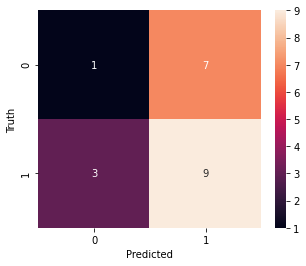

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#3. Do the exercise no 2, for KNN, SVM and Naïve Bayes models. Apply cross
validation and check the output with different segments and store the predicted output
in a .csv file.

####Using KNN
Remember that we are trying to come up with a model to predict glass "Type". We'll start with k=1.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df.head()

,Graduation_Percentage,Experience,WrittenScore,InterviewScore,Selection
0,84,0.975077,16.528798,13.354658,0
1,53,5.152711,2.559303,13.678543,1
2,64,6.202780,2.372266,16.185714,0
3,66,7.000353,9.838095,3.865421,0
4,91,14.735779,11.265794,10.963761,1


**Standardize the Variables**
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('Selection',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(df.drop('Selection',axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Graduation_Percentage,Experience,WrittenScore,InterviewScore
0,0.626969,-1.630348,0.619159,0.755047
1,-1.499512,-0.575588,-1.086518,0.812991
2,-0.744954,-0.310469,-1.109355,1.261535
3,-0.607762,-0.109099,-0.197777,-0.942617
4,1.107142,1.843926,-0.023454,0.327306


**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Selection'],
                                                    test_size=0.20)

In [ ]:
#import KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(X_test)

**Predictions and Evaluations
Let's evaluate our KNN model!**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
print(confusion_matrix(y_test,pred))

[[2 8]
 [2 8]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.50      0.20      0.29        10
           1       0.50      0.80      0.62        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.45        20
weighted avg       0.50      0.50      0.45        20



**Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value:**

In [ ]:
accuracy_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Selection'],cv=7)
    accuracy_rate.append(score.mean())

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error Rate')

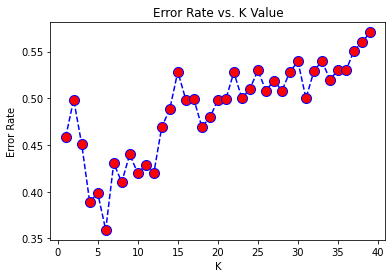

In [ ]:
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
#       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>4 the error rate starts oscillating. So K = 4 is the better choice for our KNN modle.

In [ ]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[2 8]
 [2 8]]


              precision    recall  f1-score   support

           0       0.50      0.20      0.29        10
           1       0.50      0.80      0.62        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.45        20
weighted avg       0.50      0.50      0.45        20



In [ ]:
# NOW WITH K=4
knn = KNeighborsClassifier(n_neighbors=27)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=27')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=27


[[2 8]
 [2 8]]


              precision    recall  f1-score   support

           0       0.50      0.20      0.29        10
           1       0.50      0.80      0.62        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.45        20
weighted avg       0.50      0.50      0.45        20



##Implement the SVM classifier

In [ ]:
df.head()

,Graduation_Percentage,Experience,WrittenScore,InterviewScore,Selection
0,84,0.975077,16.528798,13.354658,0
1,53,5.152711,2.559303,13.678543,1
2,64,6.202780,2.372266,16.185714,0
3,66,7.000353,9.838095,3.865421,0
4,91,14.735779,11.265794,10.963761,1


**Train Using Support Vector Machine (SVM)**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['Selection'], axis='columns')
y = df['Selection']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
len(X_train), len(X_test)

(80, 20)

In [ ]:
#Import Support Vector Classifier
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model.score(X_test, y_test)

0.5

**Hyper parameter tunning**
1. Regularization(C)

In [ ]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.5

In [ ]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.5

2. Gamma

In [ ]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.5

3. Kernel

In [ ]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model_linear_kernal.score(X_test, y_test)

0.5

## Naive Bayes Classifier

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import classification_report

In [ ]:
# We use the above dataframe df for the current problem
df.head()

,Graduation_Percentage,Experience,WrittenScore,InterviewScore,Selection
0,84,0.975077,16.528798,13.354658,0
1,53,5.152711,2.559303,13.678543,1
2,64,6.202780,2.372266,16.185714,0
3,66,7.000353,9.838095,3.865421,0
4,91,14.735779,11.265794,10.963761,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Selection'], axis=1),df['Selection'], test_size=0.2)

**BernoulliNB**

In [ ]:
model = BernoulliNB()
model.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  7],
       [ 1, 12]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.63      0.92      0.75        13

    accuracy                           0.60        20
   macro avg       0.32      0.46      0.37        20
weighted avg       0.41      0.60      0.49        20



**GaussianNB**

In [ ]:
model_Gauss = GaussianNB()
model_Gauss.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = model_Gauss.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2,  5],
       [ 3, 10]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.67      0.77      0.71        13

    accuracy                           0.60        20
   macro avg       0.53      0.53      0.52        20
weighted avg       0.57      0.60      0.58        20



#4. Write a python code to Implement the SVM classifier on Breast Cancer Dataset
using scikit-learn. Also check the accuracy of the model. Note: Dataset is available
on https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
#Drop the "Unnamed: 32" column
df = df.drop(["Unnamed: 32"], axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##Train Using Support Vector Machine (SVM)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['diagnosis'], axis='columns')
y = df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
len(X_train), len(X_test)

(455, 114)

In [ ]:
#Import Support Vector Classifier
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model.score(X_test, y_test)

0.6228070175438597

##Hyper parameter tunning
1. Regularization(C)

In [ ]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.6228070175438597

In [ ]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.6228070175438597

2. Gamma

In [ ]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.6228070175438597

#5. Write a python code to Implement the KNN classifier on Glass Type Classification
dataset using scikit-learn. Also check the accuracy of the model.
Note: Dataset is available on https://www.kaggle.com/uciml/glass

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/content/glass.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


##Standardize the Variables
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(df.drop('Type',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
scaled_features = scaler.transform(df.drop('Type',axis=1))

In [7]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


##Scatter Plot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


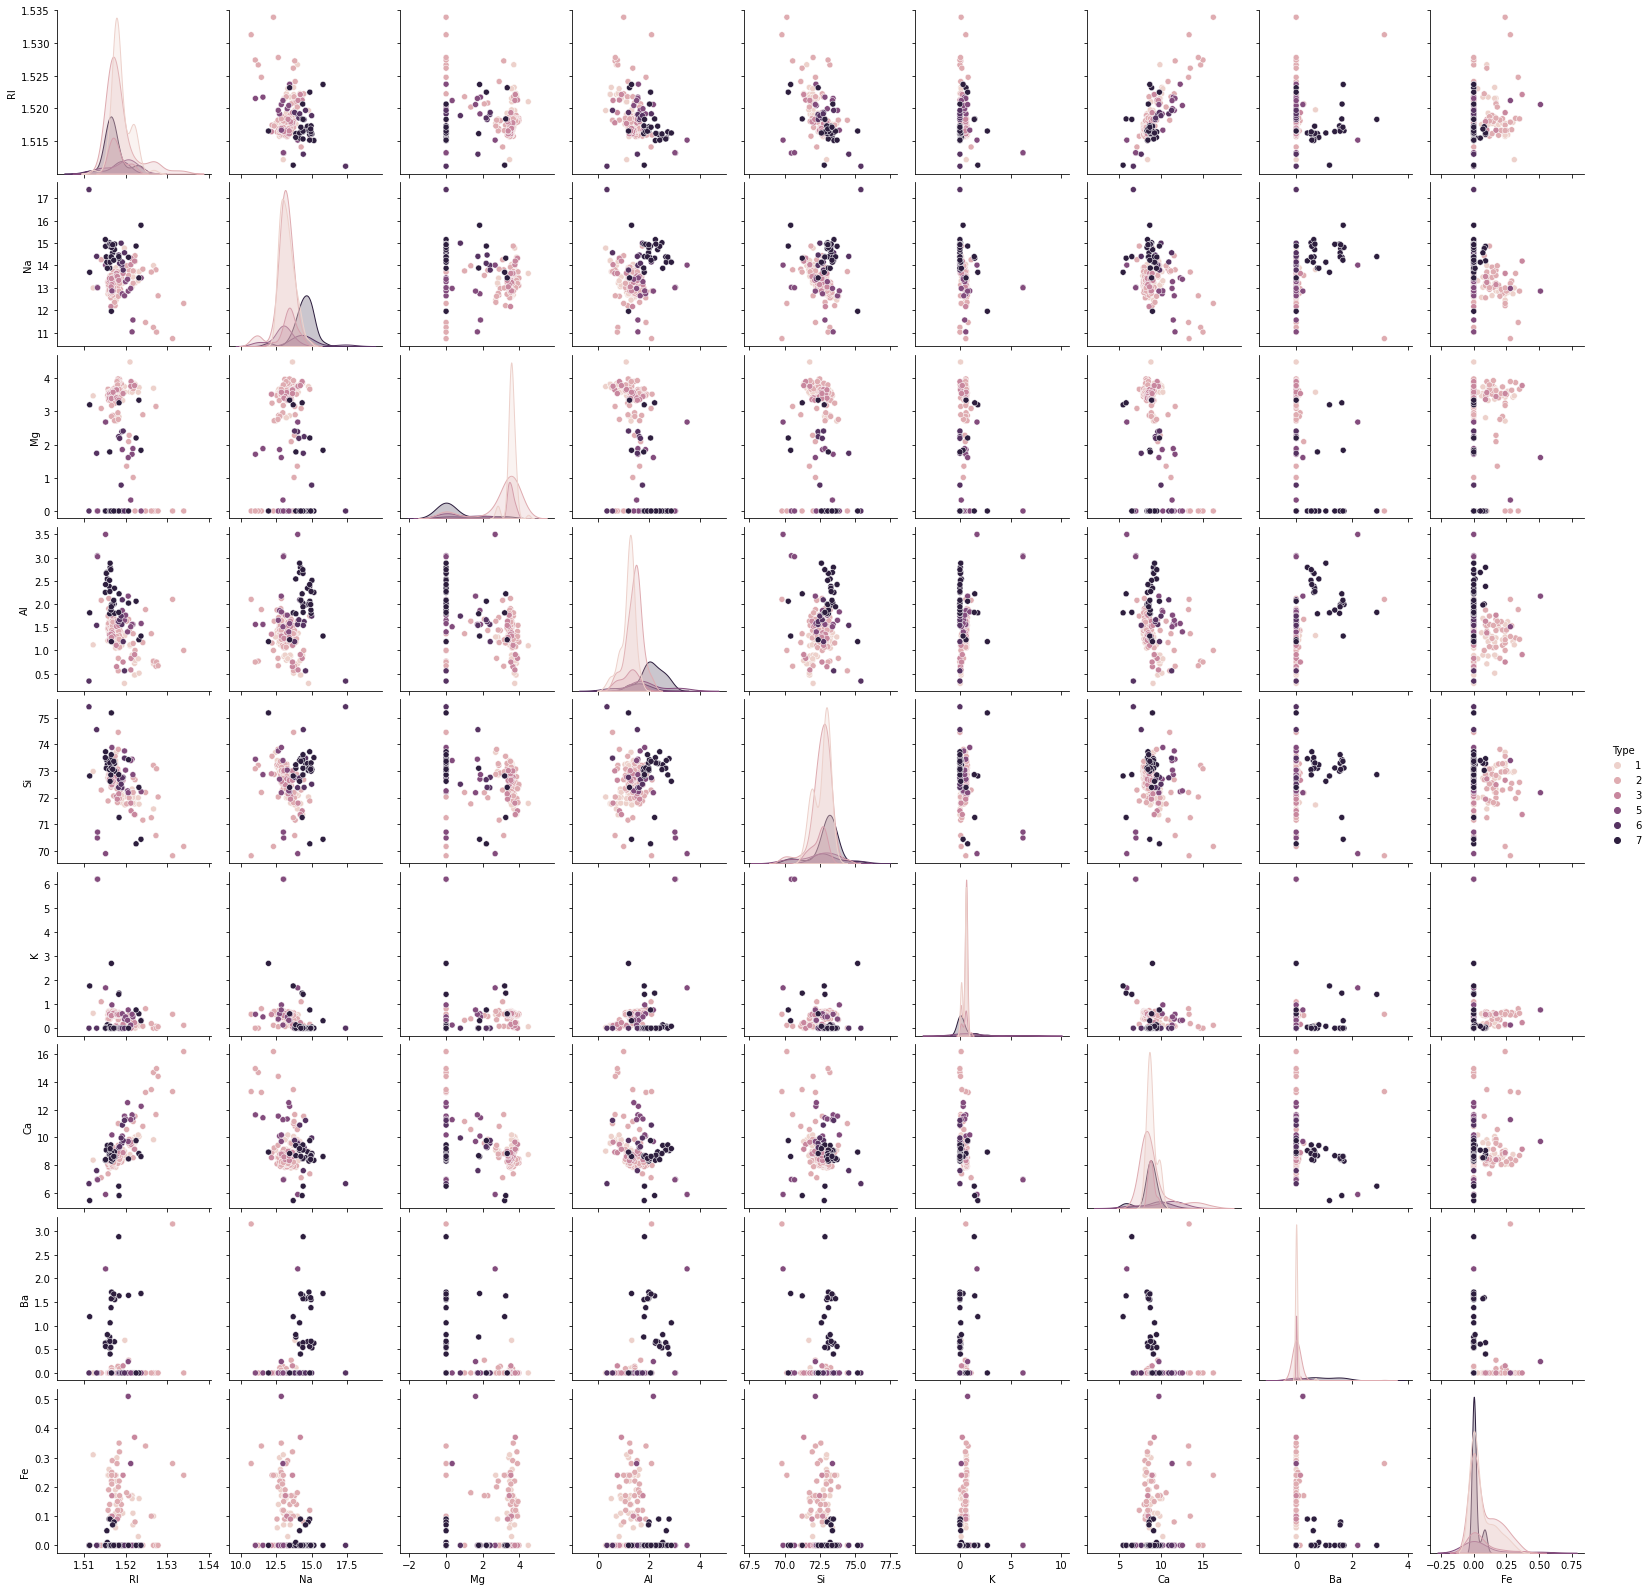

In [8]:
import seaborn as sns
sns.pairplot(df,hue='Type')

##Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Type'],
                                                    test_size=0.30)

##Using KNN
Remember that we are trying to come up with a model to predict glass "Type". We'll start with k=1.

In [11]:
#import KNN
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [14]:
pred = knn.predict(X_test)

##Predictions and Evaluations
Let's evaluate our KNN model!

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [16]:
print(confusion_matrix(y_test,pred))

[[ 9  2  3  0  0  0]
 [ 6 17  0  3  1  0]
 [ 0  0  3  0  0  0]
 [ 0  3  0  0  0  1]
 [ 0  0  0  0  2  0]
 [ 1  0  0  0  0 14]]


In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.56      0.64      0.60        14
           2       0.77      0.63      0.69        27
           3       0.50      1.00      0.67         3
           5       0.00      0.00      0.00         4
           6       0.67      1.00      0.80         2
           7       0.93      0.93      0.93        15

    accuracy                           0.69        65
   macro avg       0.57      0.70      0.62        65
weighted avg       0.70      0.69      0.69        65



##Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value:

In [18]:
accuracy_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Type'],cv=7)
    accuracy_rate.append(score.mean())

In [19]:
#error_rate = []
# Will take some time
#for i in range(1,40):  
#    knn = KNeighborsClassifier(n_neighbors=i)
#    score=cross_val_score(knn,df_feat,df['Type'],cv=7)
#    error_rate.append(1-score.mean())

In [20]:
#error_rate = []
# Will take some time
#for i in range(1,40):   
#    knn = KNeighborsClassifier(n_neighbors=i)
#    knn.fit(X_train,y_train)
#    pred_i = knn.predict(X_test)
#    error_rate.append(np.mean(pred_i != y_test))

In [21]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error Rate')

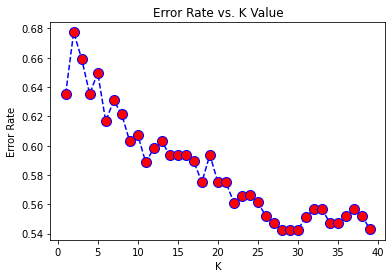

In [22]:
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
#       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>27 the error rate start getting higher. So K = 27 is the better choice for our KNN modle.

In [23]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[ 9  2  3  0  0  0]
 [ 6 17  0  3  1  0]
 [ 0  0  3  0  0  0]
 [ 0  3  0  0  0  1]
 [ 0  0  0  0  2  0]
 [ 1  0  0  0  0 14]]


              precision    recall  f1-score   support

           1       0.56      0.64      0.60        14
           2       0.77      0.63      0.69        27
           3       0.50      1.00      0.67         3
           5       0.00      0.00      0.00         4
           6       0.67      1.00      0.80         2
           7       0.93      0.93      0.93        15

    accuracy                           0.69        65
   macro avg       0.57      0.70      0.62        65
weighted avg       0.70      0.69      0.69        65



In [24]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=27)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=27')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=27


[[13  1  0  0  0  0]
 [12 15  0  0  0  0]
 [ 1  2  0  0  0  0]
 [ 2  1  0  0  0  1]
 [ 2  0  0  0  0  0]
 [ 1  3  0  0  0 11]]


              precision    recall  f1-score   support

           1       0.42      0.93      0.58        14
           2       0.68      0.56      0.61        27
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         2
           7       0.92      0.73      0.81        15

    accuracy                           0.60        65
   macro avg       0.34      0.37      0.33        65
weighted avg       0.59      0.60      0.57        65



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
